In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

In [57]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [58]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['percentage'] = pd.to_numeric(data['percentage'], errors='coerce')

In [59]:
data.isnull().sum()

region            0
category          0
parameter         0
mode              0
powertrain        0
year              0
unit              0
value          3233
percentage    12616
dtype: int64

In [60]:
data_filter = data[["year", "value"]].copy()
data_filter.dropna(inplace = True)

In [61]:
data_group = data_filter.groupby("year").sum().reset_index()
data_group

,year,value
0,2010,1.476500e+05
1,2011,3.925678e+05
2,2012,9.672260e+05
3,2013,1.786260e+06
4,2014,3.103352e+06
5,2015,5.739469e+06
6,2016,8.897489e+06
7,2017,1.357292e+07
8,2018,2.077595e+07
9,2019,2.733355e+07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


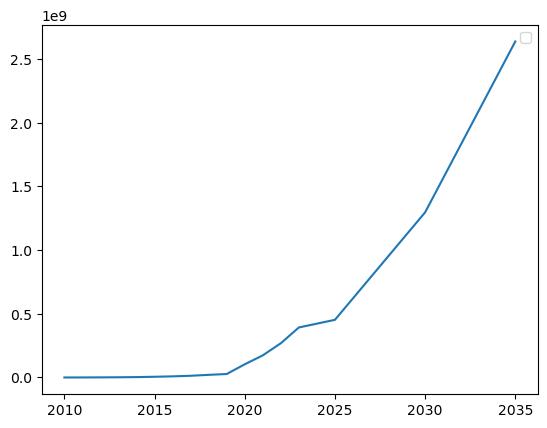

In [62]:
plt.plot(data_group["year"], data_group["value"])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


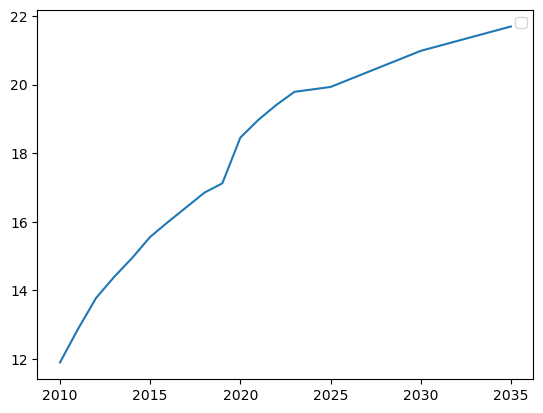

In [63]:
data_group["value"] = np.log(data_group["value"])
plt.plot(data_group["year"], data_group["value"])
plt.legend()    
plt.show()

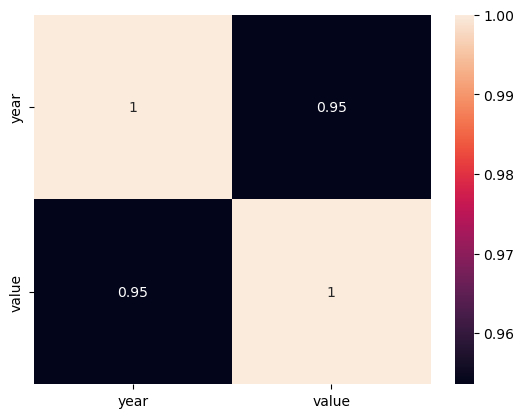

In [64]:
data_corr = data_group.corr()
sns.heatmap(data_corr, annot = True)
plt.show()

In [65]:
train = data_group[data_group["year"] <= 2023]
test = data_group[data_group["year"] >= 2023]
train, test

(    year      value
 0   2010  11.902600
 1   2011  12.880464
 2   2012  13.782187
 3   2013  14.395635
 4   2014  14.947994
 5   2015  15.562877
 6   2016  16.001280
 7   2017  16.423587
 8   2018  16.849307
 9   2019  17.123625
 10  2020  18.456488
 11  2021  18.973475
 12  2022  19.410062
 13  2023  19.788575,
     year      value
 13  2023  19.788575
 14  2025  19.930630
 15  2030  20.982722
 16  2035  21.693013)

In [66]:
train_diff_1 = train["value"].diff().dropna()
adfuller(train_diff_1)

(-3.3602522864086013,
 0.012390840300830826,
 0,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 7.64296915393604)

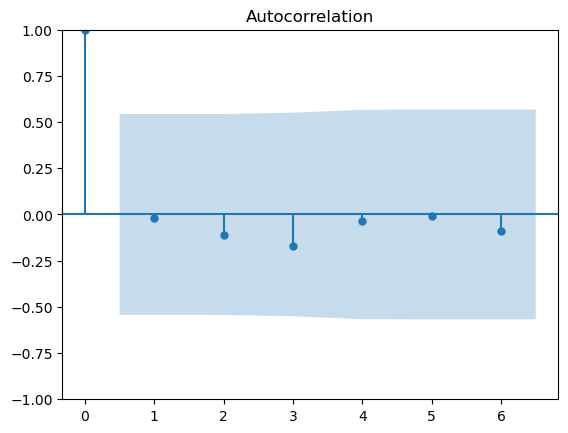

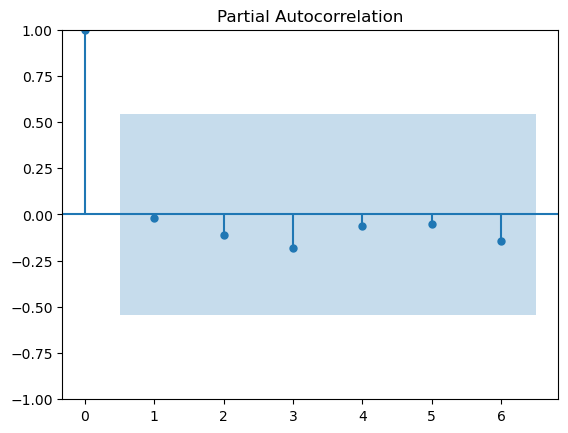

In [67]:
plot_acf(train_diff_1)
plt.show()
plot_pacf(train_diff_1)
plt.show()

In [68]:
model = ARIMA(train_diff_1, order = (1, 0, 1))
model_fit = model.fit()

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.p

In [69]:
forecast = model_fit.forecast(steps = len(test))
forecast

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


13    0.675335
14    0.636086
15    0.615044
16    0.603762
Name: predicted_mean, dtype: float64

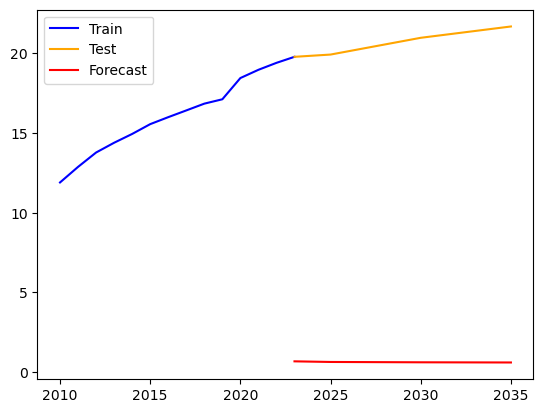

In [70]:
plt.plot(train["year"], train["value"], label="Train", color = "blue")
plt.plot(test["year"], test["value"], label="Test", color = "orange")
plt.plot(test["year"], forecast, label="Forecast", color = "red")
plt.legend()
plt.show()

In [71]:
mean_squared_error(test["value"], forecast), mean_absolute_error(test["value"], forecast), mean_absolute_percentage_error(test["value"], forecast)
# MSE - MAE - MAPE 

(399.29854934340784, 19.966178319164758, 0.9692033692066742)

ARIMA(0, 1, 0): (409.4692977057308, 20.220222402298806, 0.9815982045239592) <br/>
ARIMA(1, 1, 1): (400.48434028406496, 19.99698452001091, 0.970753535545093) </br>
ARIMA(1, 0, 1): (399.29854934340784, 19.966178319164758, 0.9692033692066742) </br>